<a href="https://colab.research.google.com/github/jeniferGoncalvesDaSilvaDev/Previsao-acoes-kfc/blob/main/previsao_acoes_kfc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/csv/KFC Dataset.csv')

In [ ]:
df.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
6020,2024-05-20,1506.0,1518.0,1491.0,1501.0,1501.0,9900
6021,2024-05-21,1520.0,1538.0,1500.0,1506.0,1506.0,9200
6022,2024-05-22,1520.0,1520.0,1485.0,1487.0,1487.0,10500
6023,2024-05-23,1500.0,1514.0,1491.0,1500.0,1500.0,10600
6024,2024-05-24,1498.0,1520.0,1485.0,1520.0,1520.0,5200


Estatísticas descritivas das colunas numérica

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6025.000000,6025.000000,6025.000000,6025.000000,6025.000000,6025.000000
mean,1219.995519,1229.135768,1209.362988,1218.691784,970.504024,5162.174274
std,638.848449,650.616742,625.242652,637.004092,557.583371,16250.057256
min,397.000000,397.000000,392.000000,392.000000,282.278015,0.000000
25%,650.000000,650.000000,650.000000,650.000000,482.465027,1000.000000
50%,1000.000000,1000.000000,1000.000000,1000.000000,702.200500,2000.000000
75%,1833.000000,1846.000000,1811.000000,1830.000000,1556.750366,4600.000000
max,4150.000000,4400.000000,3660.000000,3750.000000,2911.717529,384500.000000


Limpeza e tratamento de dados

In [ ]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6025 entries, 0 to 6024
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6025 non-null   object 
 1   Open       6025 non-null   float64
 2   High       6025 non-null   float64
 3   Low        6025 non-null   float64
 4   Close      6025 non-null   float64
 5   Adj Close  6025 non-null   float64
 6   Volume     6025 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 329.6+ KB


In [ ]:


# Convertendo a coluna 'Date' para o tipo datetime
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6025 entries, 0 to 6024
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6025 non-null   datetime64[ns]
 1   Open       6025 non-null   float64       
 2   High       6025 non-null   float64       
 3   Low        6025 non-null   float64       
 4   Close      6025 non-null   float64       
 5   Adj Close  6025 non-null   float64       
 6   Volume     6025 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 329.6 KB


Análise exploratória dos dados

In [ ]:


# Filtrando as datas de 2020 a 2024
df_2020_2024 = df[(df['Date'].dt.year >= 2020) & (df['Date'].dt.year <= 2024)]

In [ ]:
df_2020_2024['Date']

,Date
4953,2020-01-06
4954,2020-01-07
4955,2020-01-08
4956,2020-01-09
4957,2020-01-10
...,...
6020,2024-05-20
6021,2024-05-21
6022,2024-05-22
6023,2024-05-23


In [ ]:
df_2020_2024

,Date,Open,High,Low,Close,Adj Close,Volume
4953,2020-01-06,2144.0,2164.0,2117.0,2163.0,1796.645142,4500
4954,2020-01-07,2165.0,2209.0,2165.0,2175.0,1806.612793,8500
4955,2020-01-08,2170.0,2170.0,2103.0,2132.0,1770.895996,6300
4956,2020-01-09,2152.0,2174.0,2152.0,2162.0,1795.814697,1700
4957,2020-01-10,2162.0,2174.0,2158.0,2174.0,1805.782227,3300
...,...,...,...,...,...,...,...
6020,2024-05-20,1506.0,1518.0,1491.0,1501.0,1501.000000,9900
6021,2024-05-21,1520.0,1538.0,1500.0,1506.0,1506.000000,9200
6022,2024-05-22,1520.0,1520.0,1485.0,1487.0,1487.000000,10500
6023,2024-05-23,1500.0,1514.0,1491.0,1500.0,1500.000000,10600


In [ ]:
df_2020_2024.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1072,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000
mean,2022-03-16 04:55:31.343283456,1715.943097,1727.860075,1701.442164,1713.440299,1552.811982,5965.018657
min,2020-01-06 00:00:00,1180.000000,1189.000000,1176.000000,1182.000000,1098.554565,100.000000
25%,2021-02-09 18:00:00,1363.000000,1365.000000,1351.000000,1359.500000,1312.095947,1800.000000
50%,2022-03-16 12:00:00,1719.000000,1732.000000,1693.500000,1711.000000,1579.985352,3500.000000
75%,2023-04-19 06:00:00,1990.250000,2002.000000,1974.000000,1987.000000,1748.935791,6600.000000
max,2024-05-24 00:00:00,2420.000000,2452.000000,2360.000000,2423.000000,2096.666748,76700.000000
std,NaN,315.597401,318.904253,312.033436,314.910015,229.615321,7922.983515


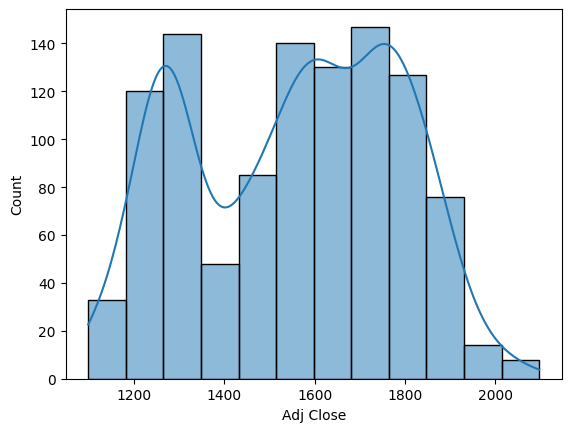

In [ ]:
#verificar a distribuição de valores de fechamento
fechamento = df_2020_2024['Adj Close']
sb.histplot(fechamento, kde= True)
plt.show()

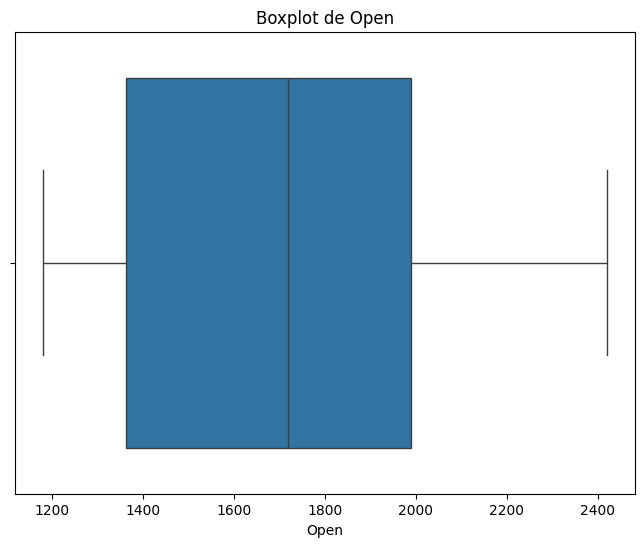

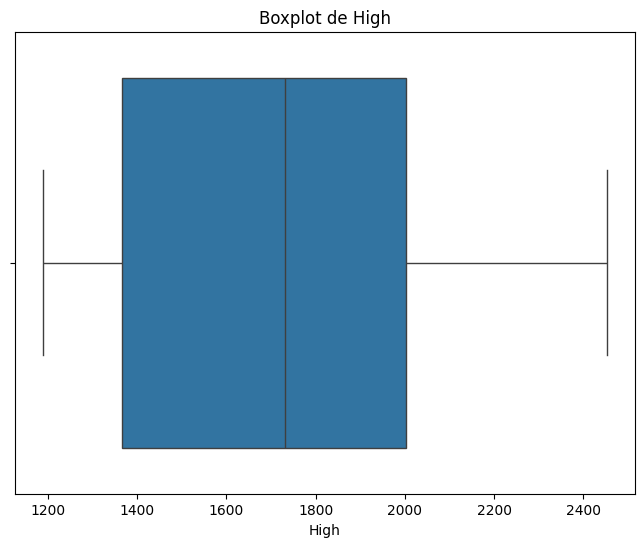

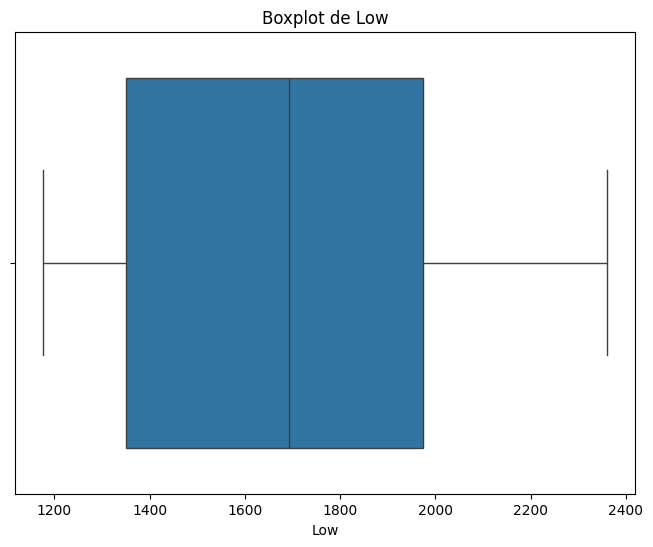

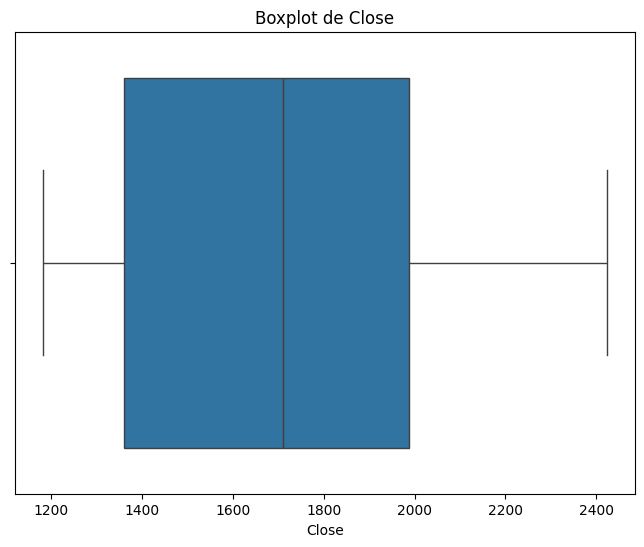

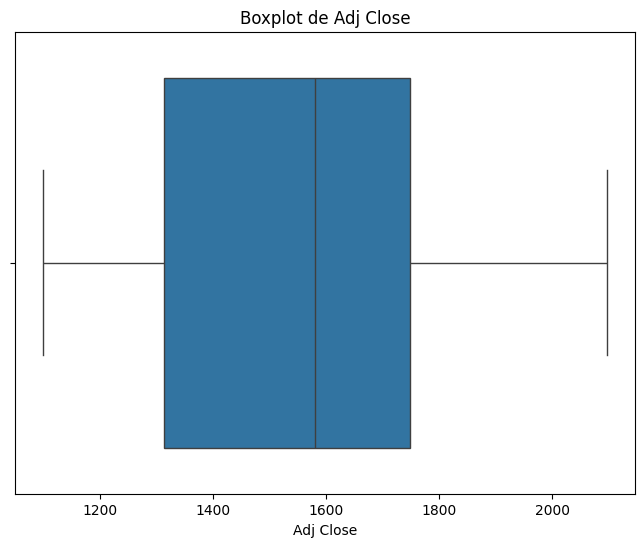

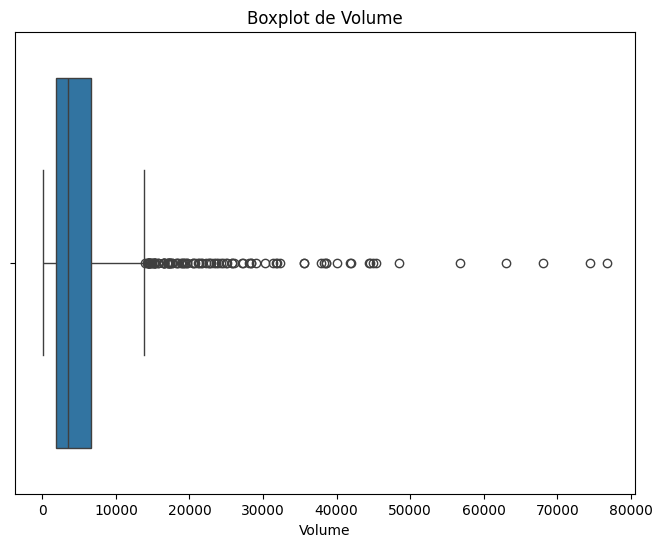

In [ ]:


# Selecionar apenas colunas numéricas, excluindo as colunas de data
numeric_cols = df_2020_2024.select_dtypes(include=np.number).columns
numeric_df = df_2020_2024[numeric_cols]

# Gerar boxplots para cada coluna numérica
for col in numeric_df.columns:
  plt.figure(figsize=(8, 6))
  sb.boxplot(x=numeric_df[col])
  plt.title(f'Boxplot de {col}')
  plt.show()

           Date    Open    High     Low   Close    Adj Close  Volume
4953 2020-01-06  2144.0  2164.0  2117.0  2163.0  1796.645142    4500
4954 2020-01-07  2165.0  2209.0  2165.0  2175.0  1806.612793    8500
4955 2020-01-08  2170.0  2170.0  2103.0  2132.0  1770.895996    6300
4956 2020-01-09  2152.0  2174.0  2152.0  2162.0  1795.814697    1700
4957 2020-01-10  2162.0  2174.0  2158.0  2174.0  1805.782227    3300
...         ...     ...     ...     ...     ...          ...     ...
6020 2024-05-20  1506.0  1518.0  1491.0  1501.0  1501.000000    9900
6021 2024-05-21  1520.0  1538.0  1500.0  1506.0  1506.000000    9200
6022 2024-05-22  1520.0  1520.0  1485.0  1487.0  1487.000000   10500
6023 2024-05-23  1500.0  1514.0  1491.0  1500.0  1500.000000   10600
6024 2024-05-24  1498.0  1520.0  1485.0  1520.0  1520.000000    5200

[974 rows x 7 columns]


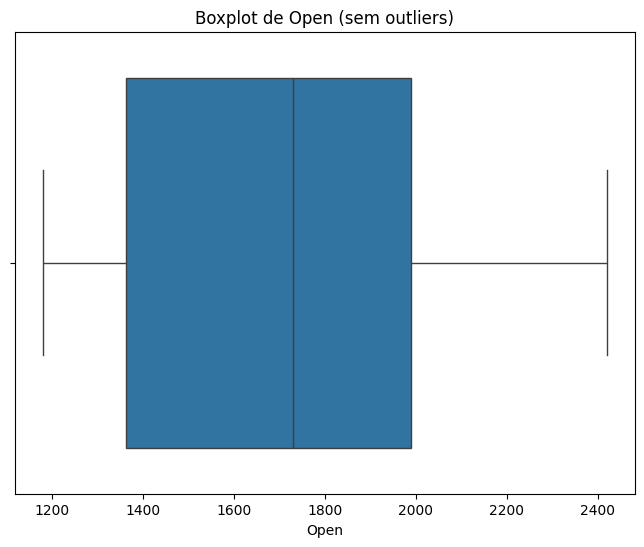

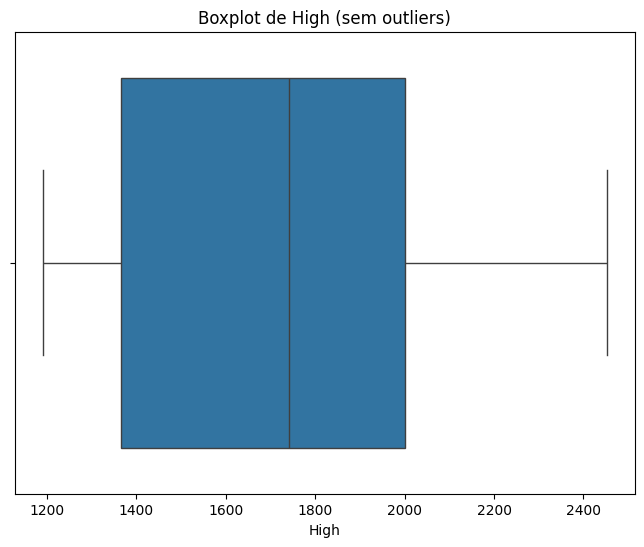

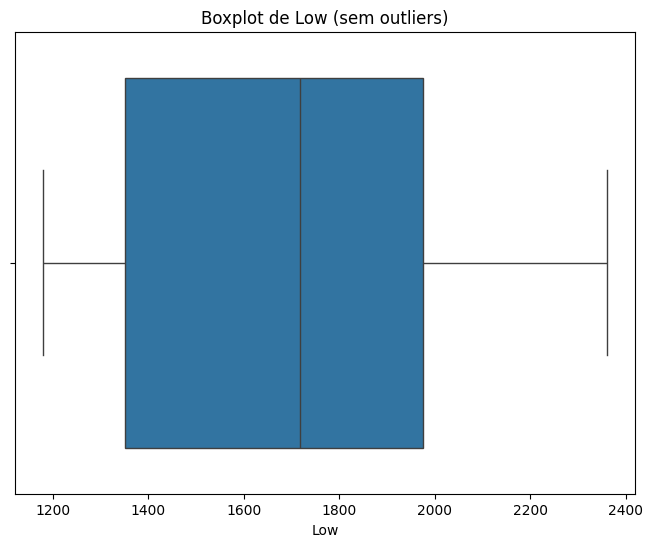

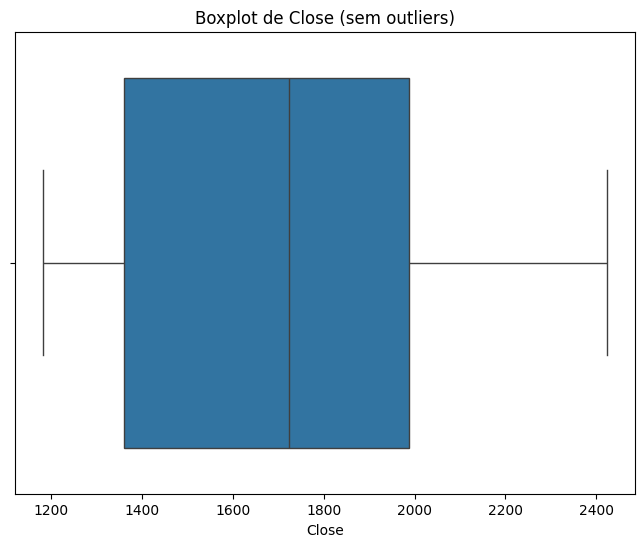

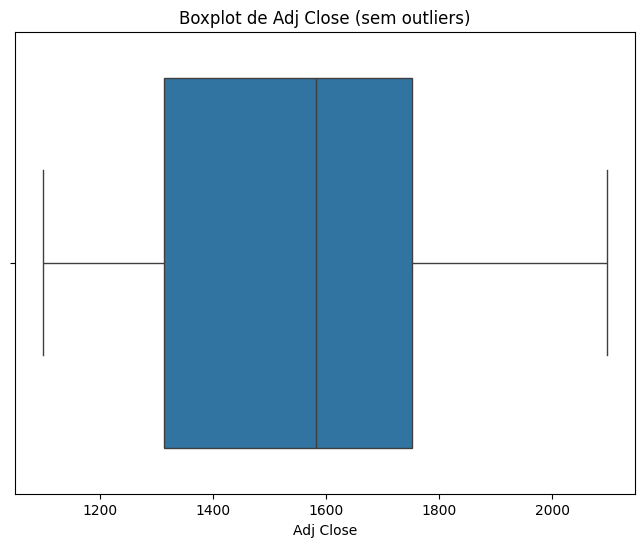

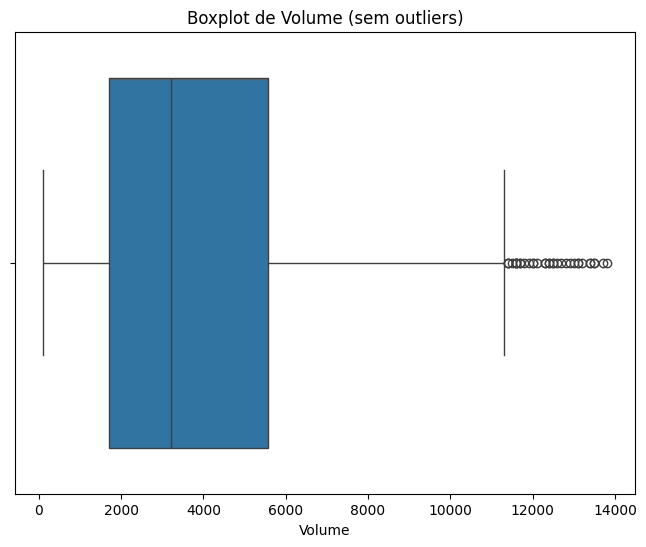

In [ ]:


def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_no_outliers

# Aplicar a função para cada coluna numérica
for col in numeric_cols:
    df_2020_2024 = remove_outliers_iqr(df_2020_2024, col)

# Exibir o DataFrame sem outliers
print(df_2020_2024)

# Gerar novos boxplots para verificar a remoção dos outliers
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sb.boxplot(x=df_2020_2024[col])
    plt.title(f'Boxplot de {col} (sem outliers)')
    plt.show()

In [ ]:
# Aplicar a função para cada coluna numérica
def df_sem_outliers(df): # Add df as a parameter to the function
   for col in numeric_cols:
    df = remove_outliers_iqr(df, col) # Update df with the result
   return df  # Return the modified df

# Call the function with df_2020_2024 as argument and update df_2020_2024
df_2020_2024 = df_sem_outliers(df_2020_2024)

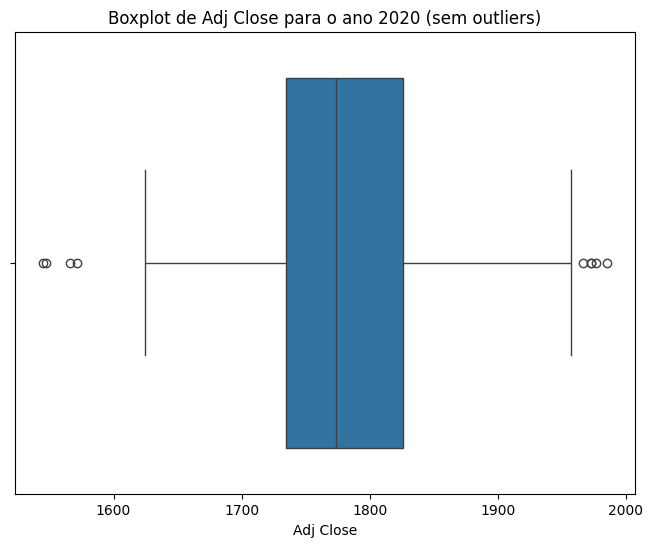

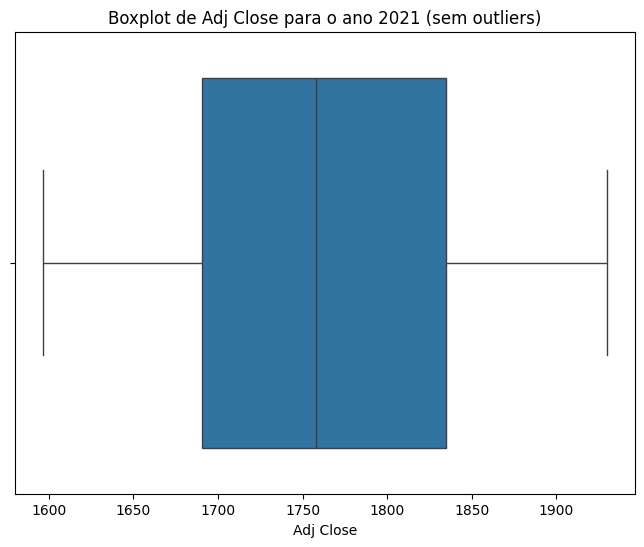

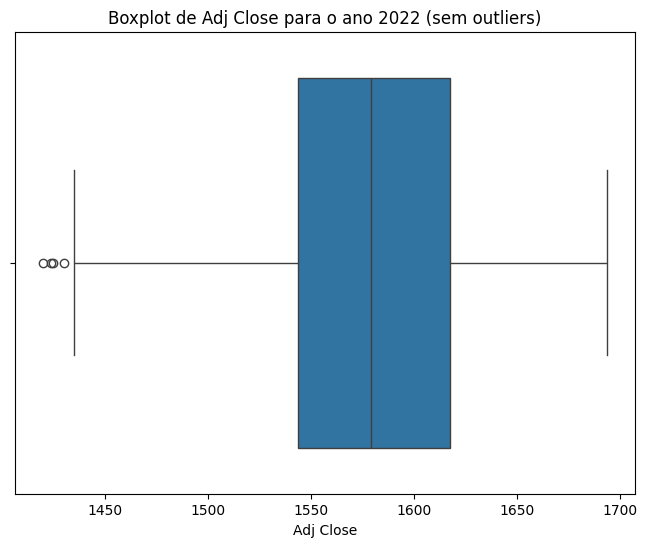

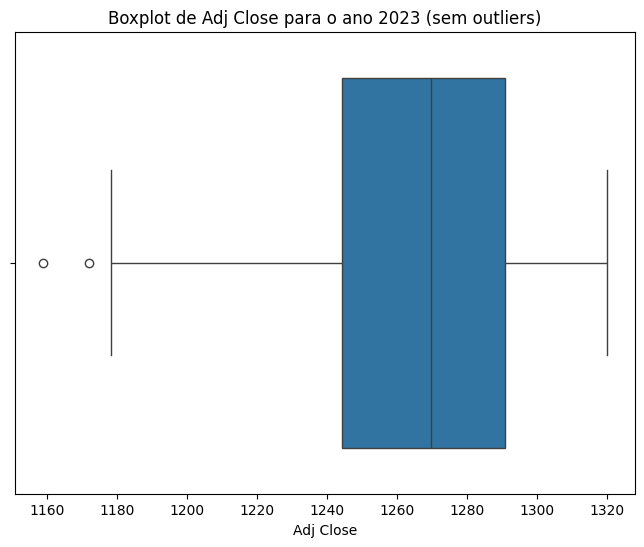

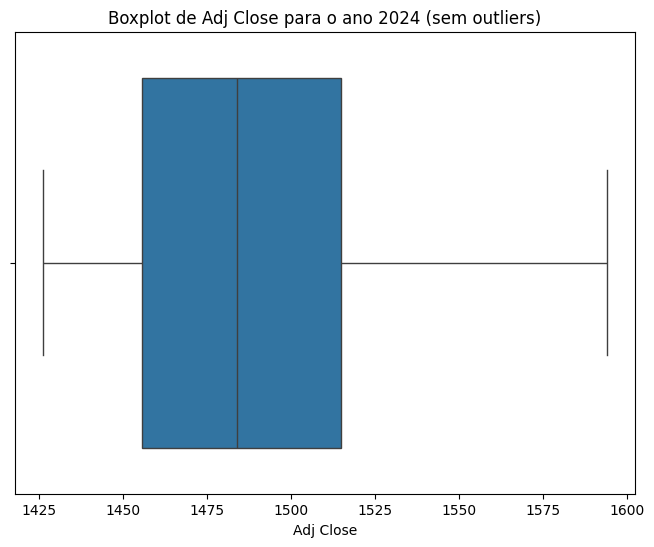

In [ ]:
# Chamando a função remove_outliers_iqr e gerando os box plots de Adj Close por ano

# Criar uma nova coluna 'Ano' com o ano extraído da coluna 'Date'
df_2020_2024['Ano'] = df_2020_2024['Date'].dt.year

# Agrupar o DataFrame por ano usando a nova coluna 'Ano'
grouped = df_2020_2024.groupby('Ano')

# Iterar pelos grupos (anos)
for year, group_df in grouped:
    # Aplicar a função para remover outliers da coluna 'Adj Close' para cada ano
    group_df_no_outliers = remove_outliers_iqr(group_df, 'Adj Close')

    # Gerar o boxplot para o ano atual
    plt.figure(figsize=(8, 6))
    sb.boxplot(x=group_df_no_outliers['Adj Close'])
    plt.title(f'Boxplot de Adj Close para o ano {year} (sem outliers)')
    plt.show()

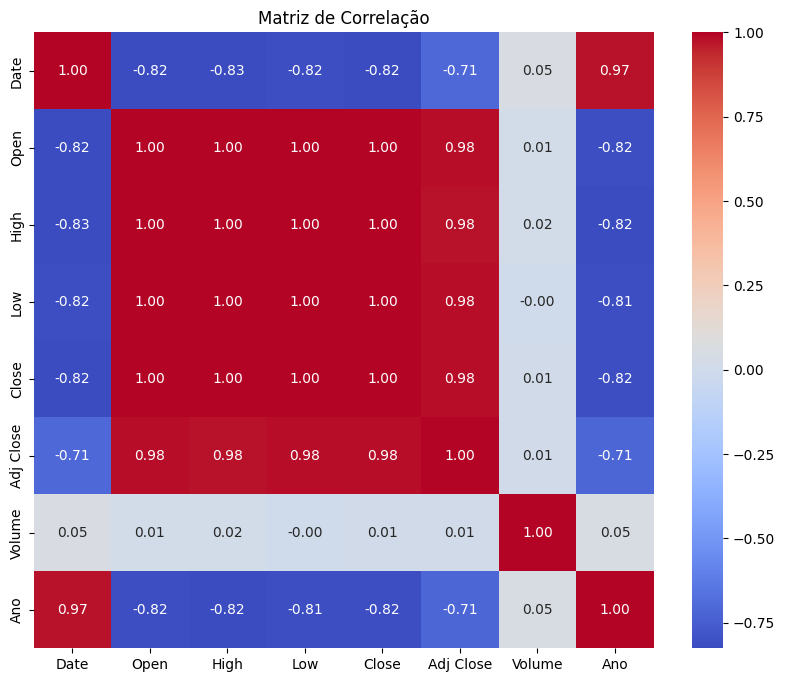

In [ ]:


# Calculate and plot the correlation matrix
correlation_matrix = df_2020_2024.corr()
plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

Respondendo umas perguntas de negócio
1- qual a variação do valor de fechamento ajustado por ano?

In [ ]:
variacao_fechamento_por_ano = df_2020_2024.groupby('Ano')['Adj Close'].std()
variacao_fechamento_por_ano

,Adj Close
Ano,
2020,181.988026
2021,83.406070
2022,120.898160
2023,51.826441
2024,48.890686


Qual a média do valor de fechamento por ano?

In [ ]:
mediana_fechamento_por_ano = df_2020_2024.groupby('Ano')['Adj Close'].median()
mediana_fechamento_por_ano

,Adj Close
Ano,
2020,1756.596680
2021,1757.657104
2022,1568.026855
2023,1266.651245
2024,1481.305176


Qual é o valor mais frequente por ano?

In [ ]:
moda_fechamento_por_ano = df_2020_2024.groupby('Ano')['Adj Close'].agg(pd.Series.mode)
moda_fechamento_por_ano

,Adj Close
Ano,
2020,1773.902954
2021,1757.657104
2022,1579.985352
2023,1276.320313
2024,"[1450.364014, 1519.0]"


Os valores em abertura, alta e baixa, impactam no valor de fechamento?

In [ ]:
# prompt: prompt: Calcula a correlação entre valores de fechamento ajustado e abertura, fechamento ajustado e alta, fechamento ajustado e baixa e compare com o valor p de 0.5

from scipy.stats import pearsonr

# Calculate Pearson correlation and p-value
correlation_adj_close_open, p_value_open = pearsonr(df_2020_2024['Adj Close'], df_2020_2024['Open'])
correlation_adj_close_high, p_value_high = pearsonr(df_2020_2024['Adj Close'], df_2020_2024['High'])
correlation_adj_close_low, p_value_low = pearsonr(df_2020_2024['Adj Close'], df_2020_2024['Low'])

# Print the results, comparing p-values to 0.5
print(f"Correlation between Adj Close and Open: {correlation_adj_close_open}, p-value: {p_value_open}")
print(f"Is p-value < 0.5? {p_value_open < 0.5}")

print(f"Correlation between Adj Close and High: {correlation_adj_close_high}, p-value: {p_value_high}")
print(f"Is p-value < 0.5? {p_value_high < 0.5}")

print(f"Correlation between Adj Close and Low: {correlation_adj_close_low}, p-value: {p_value_low}")
print(f"Is p-value < 0.5? {p_value_low < 0.5}")

Correlation between Adj Close and Open: 0.9792426415566466, p-value: 0.0
Is p-value < 0.5? True
Correlation between Adj Close and High: 0.978115345312192, p-value: 0.0
Is p-value < 0.5? True
Correlation between Adj Close and Low: 0.981637821063355, p-value: 0.0
Is p-value < 0.5? True


Como o ano impacta no preço de abertura, fechamento ajustado, alta e baixa?

             Open    Adj Close         High          Low
Ano                                                     
2020  2010.632743  1720.869074  2029.256637  1989.079646
2021  1982.466019  1757.749609  1992.310680  1968.660194
2022  1675.297674  1539.034786  1682.995349  1666.539535
2023  1308.502242  1253.291975  1314.959641  1300.730942
2024  1516.086957  1484.747099  1525.594203  1499.521739


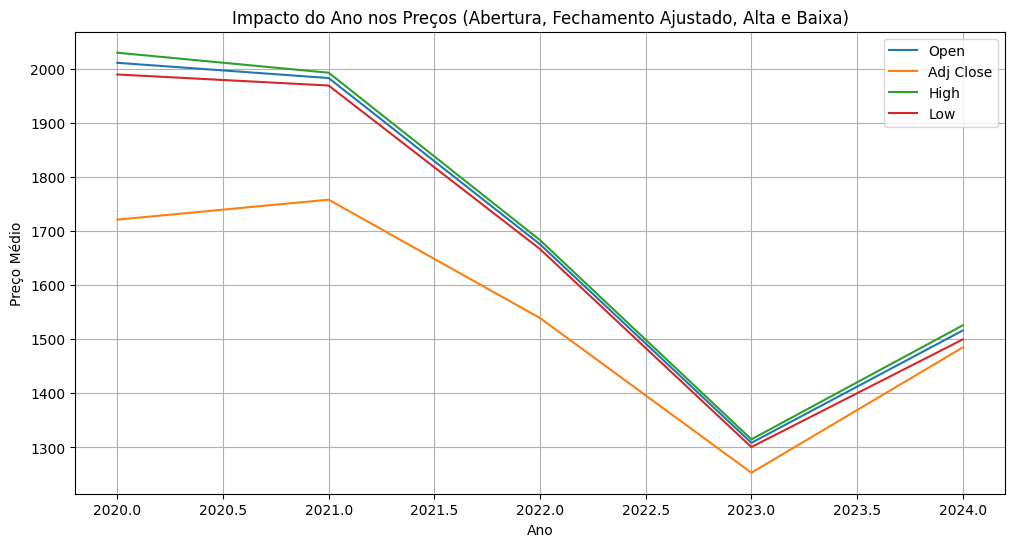

In [ ]:
# prompt: Como o ano impacta no preço de abertura, fechamento ajustado, alta e baixa?

# Group data by year and calculate the mean for 'Open', 'Adj Close', 'High', and 'Low'
yearly_impact = df_2020_2024.groupby('Ano')[['Open', 'Adj Close', 'High', 'Low']].mean()

# Display the result
print(yearly_impact)

# Create a line plot to visualize the impact of the year on prices
plt.figure(figsize=(12, 6))
for column in ['Open', 'Adj Close', 'High', 'Low']:
    plt.plot(yearly_impact.index, yearly_impact[column], label=column)

plt.xlabel('Ano')
plt.ylabel('Preço Médio')
plt.title('Impacto do Ano nos Preços (Abertura, Fechamento Ajustado, Alta e Baixa)')
plt.legend()
plt.grid(True)
plt.show()

Qual é a correlação entre ano e fechamento,ano e abertura,ano e baixa,ano e alta(É menor que p valor de 0.5)?

In [ ]:
# prompt: Qual é a correlação entre ano e fechamento,ano e abertura,ano e baixa,ano e alta(É menor que p valor de 0.5)?

# Calculate Pearson correlation and p-value for year vs. other columns
correlation_year_close, p_value_year_close = pearsonr(df_2020_2024['Ano'], df_2020_2024['Adj Close'])
correlation_year_open, p_value_year_open = pearsonr(df_2020_2024['Ano'], df_2020_2024['Open'])
correlation_year_low, p_value_year_low = pearsonr(df_2020_2024['Ano'], df_2020_2024['Low'])
correlation_year_high, p_value_year_high = pearsonr(df_2020_2024['Ano'], df_2020_2024['High'])

# Print the results, comparing p-values to 0.5
print(f"Correlation between Year and Adj Close: {correlation_year_close}, p-value: {p_value_year_close}")
print(f"Is p-value < 0.5? {p_value_year_close < 0.5}")

print(f"Correlation between Year and Open: {correlation_year_open}, p-value: {p_value_year_open}")
print(f"Is p-value < 0.5? {p_value_year_open < 0.5}")

print(f"Correlation between Year and Low: {correlation_year_low}, p-value: {p_value_year_low}")
print(f"Is p-value < 0.5? {p_value_year_low < 0.5}")

print(f"Correlation between Year and High: {correlation_year_high}, p-value: {p_value_year_high}")
print(f"Is p-value < 0.5? {p_value_year_high < 0.5}")

Correlation between Year and Adj Close: -0.7130355415027374, p-value: 1.186897861800062e-146
Is p-value < 0.5? True
Correlation between Year and Open: -0.8173398411853157, p-value: 1.3467660382959767e-226
Is p-value < 0.5? True
Correlation between Year and Low: -0.814213959891792, p-value: 1.7106944509734768e-223
Is p-value < 0.5? True
Correlation between Year and High: -0.8212084754765515, p-value: 1.6007204451080672e-230
Is p-value < 0.5? True


Previsão de preço de fechamento por ano entre 2020-2024

In [ ]:
fechamento_por_ano = df_2020_2024[['Adj Close', 'Ano']]
fechamento_por_ano

,Adj Close,Ano
4953,1796.645142,2020
4954,1806.612793,2020
4955,1770.895996,2020
4956,1795.814697,2020
4957,1805.782227,2020
...,...,...
6020,1501.000000,2024
6021,1506.000000,2024
6022,1487.000000,2024
6023,1500.000000,2024


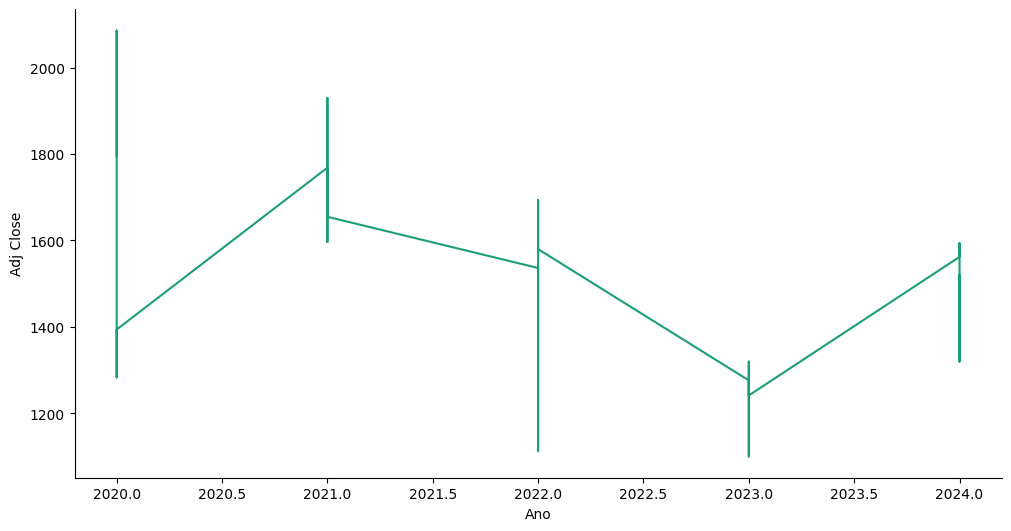

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Ano']
  ys = series['Adj Close']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = fechamento_por_ano.sort_values('Ano', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Ano')
_ = plt.ylabel('Adj Close')

Teste de Shapiro-Wilk para Normalidade: Estatística=0.957, p-valor=0.000
A série rejeita a hipótese de normalidade.
Teste de Levene para Homocedasticidade: Estatística=37.188, p-valor=0.000
A variância não é igual entre os grupos.
Teste ADF para Estacionariedade: Estatística=-1.739, p-valor=0.411
A série não é estacionária.
                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     969.1
Date:                Fri, 28 Feb 2025   Prob (F-statistic):          1.19e-146
Time:                        01:19:31   Log-Likelihood:                -6090.5
No. Observations:                 939   AIC:                         1.219e+04
Df Residuals:                     937   BIC:                         1.219e+04
Df Model:                           1     

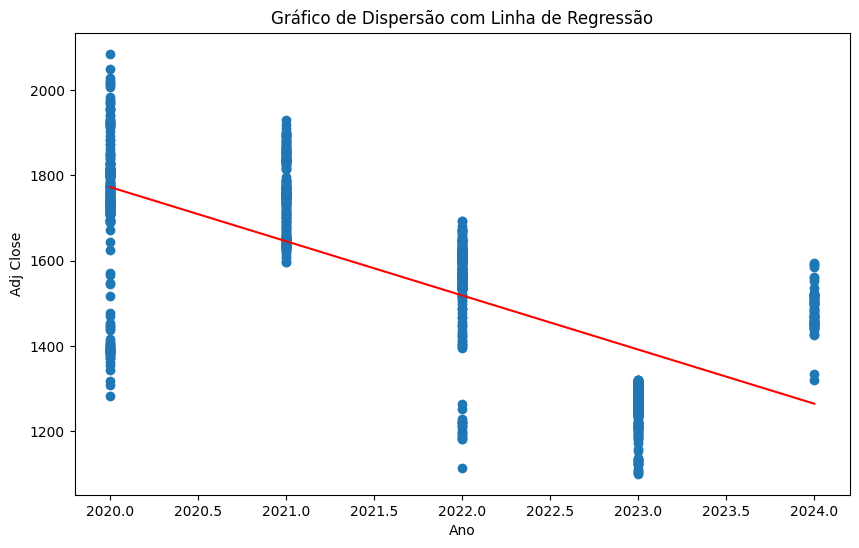

In [ ]:
# prompt: Faça um teste de normalidade, homocedasticidade, estacionariedade e linearidade do dataset fechamento_por_ano

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import shapiro, levene
import statsmodels.api as sm

# ... (your existing code) ...

# Testes de normalidade (Shapiro-Wilk)
statistic, p_value = shapiro(fechamento_por_ano['Adj Close'])
print(f"Teste de Shapiro-Wilk para Normalidade: Estatística={statistic:.3f}, p-valor={p_value:.3f}")
if p_value > 0.05:
    print("A série não rejeita a hipótese de normalidade.")
else:
    print("A série rejeita a hipótese de normalidade.")

# Testes de homocedasticidade (Levene) - Comparação entre anos
groups = [group['Adj Close'].values for _, group in fechamento_por_ano.groupby('Ano')]
statistic, p_value = levene(*groups)
print(f"Teste de Levene para Homocedasticidade: Estatística={statistic:.3f}, p-valor={p_value:.3f}")
if p_value > 0.05:
    print("A variância é igual entre os grupos.")
else:
    print("A variância não é igual entre os grupos.")

# Teste de estacionariedade (Augmented Dickey-Fuller)
result = adfuller(fechamento_por_ano['Adj Close'])
print(f"Teste ADF para Estacionariedade: Estatística={result[0]:.3f}, p-valor={result[1]:.3f}")
if result[1] < 0.05:
    print("A série é estacionária.")
else:
    print("A série não é estacionária.")

# Teste de Linearidade (visualização com gráfico de dispersão)
# Primeiro vamos transformar o ano para ser um índice
fechamento_por_ano = fechamento_por_ano.set_index('Ano')

# Adicionando uma constante para a regressão
X = sm.add_constant(fechamento_por_ano.index.astype(int))
y = fechamento_por_ano['Adj Close']
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

plt.figure(figsize=(10, 6))
plt.scatter(fechamento_por_ano.index, fechamento_por_ano['Adj Close'])
plt.plot(fechamento_por_ano.index, modelo.predict(X), color='red')  # Adiciona a linha de regressão
plt.xlabel('Ano')
plt.ylabel('Adj Close')
plt.title('Gráfico de Dispersão com Linha de Regressão')
plt.show()

# Avaliação da Linearidade: analise o R-squared do modelo OLS e observe o gráfico de dispersão.
# Um R-squared alto e uma relação linear no gráfico indicam maior linearidade.

Teste ADF para Estacionariedade (Série Diferenciada): Estatística=-20.588, p-valor=0.000
A série diferenciada é estacionária.


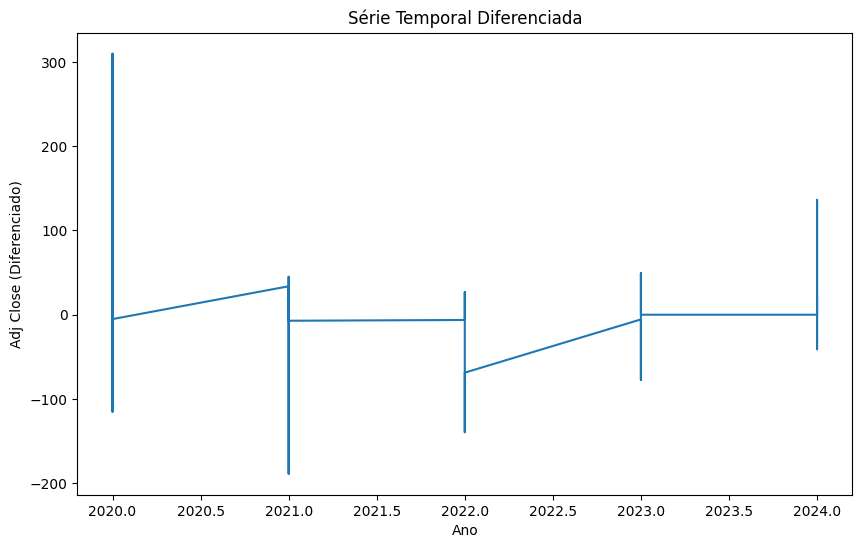

In [ ]:
# prompt: Transforma a série em estacionária

# Diferenciação da série temporal
fechamento_por_ano['Adj Close_diff'] = fechamento_por_ano['Adj Close'].diff()

# Remover o primeiro valor NaN resultante da diferenciação
fechamento_por_ano = fechamento_por_ano.dropna()

# Teste ADF para a série diferenciada
result_diff = adfuller(fechamento_por_ano['Adj Close_diff'])
print(f"Teste ADF para Estacionariedade (Série Diferenciada): Estatística={result_diff[0]:.3f}, p-valor={result_diff[1]:.3f}")
if result_diff[1] < 0.05:
    print("A série diferenciada é estacionária.")
else:
    print("A série diferenciada não é estacionária.")

# Plot da série diferenciada
plt.figure(figsize=(10, 6))
plt.plot(fechamento_por_ano['Adj Close_diff'])
plt.xlabel('Ano')
plt.ylabel('Adj Close (Diferenciado)')
plt.title('Série Temporal Diferenciada')
plt.show()

In [ ]:
fechamento_por_ano

,Adj Close,Adj Close_diff
Ano,,
2020,1806.612793,9.967651
2020,1770.895996,-35.716797
2020,1795.814697,24.918701
2020,1805.782227,9.967530
2020,1808.273926,2.491699
...,...,...
2024,1501.000000,11.000000
2024,1506.000000,5.000000
2024,1487.000000,-19.000000


In [ ]:
# prompt: separa os dados de fechamento por ano em 70% de treino e restante de teste e validação

from sklearn.model_selection import train_test_split

# Supondo que 'fechamento_por_ano' é o seu DataFrame com 'Adj Close' e 'Ano'
# Certifique-se de que 'Ano' seja numérico (int ou float) antes de dividir os dados

# Separando os dados em treino (70%), teste (15%) e validação (15%)
train_data, temp_data = train_test_split(fechamento_por_ano, train_size=0.7, shuffle=False)
test_data, validation_data = train_test_split(temp_data, train_size=0.5, shuffle=False)

# Imprimindo os tamanhos dos conjuntos de dados
print(f"Tamanho do conjunto de treino: {len(train_data)}")
print(f"Tamanho do conjunto de teste: {len(test_data)}")
print(f"Tamanho do conjunto de validação: {len(validation_data)}")

# Agora você pode acessar os dados de cada conjunto usando:
# train_data['Adj Close'] , train_data['Ano']
# test_data['Adj Close'], test_data['Ano']
# validation_data['Adj Close'], validation_data['Ano']

Tamanho do conjunto de treino: 656
Tamanho do conjunto de teste: 141
Tamanho do conjunto de validação: 141


In [ ]:
# prompt: Importa Arima

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

In [ ]:
# prompt: Treina e valide o modelo, na validação não usa o grid search! Coloque como parâmetro 0,1,0 no Arima. Coloque os valores previstos e reais em um data frame

# Treinamento do modelo ARIMA
# Reset the index of train_data to a simple numerical index before training the model
train_data = train_data.reset_index(drop=True)
model = ARIMA(train_data['Adj Close'], order=(0, 1, 0)) # ordem (p,d,q)
model_fit = model.fit()

# Previsões no conjunto de teste
# Generate a range of index values for the test set predictions
predictions = model_fit.predict(start=0, end=len(test_data) - 1)

# Cria um DataFrame para comparar valores reais e previstos
# Reset the index of test_data['Adj Close'] before creating the results DataFrame
results_df = pd.DataFrame({'Real': test_data['Adj Close'].reset_index(drop=True), 'Previsto': predictions})
print(results_df)

# Avaliação do modelo (MAE no conjunto de teste)
mae = mean_absolute_error(test_data['Adj Close'], predictions)
print(f'MAE no conjunto de teste: {mae}')

# Previsões no conjunto de validação (sem GridSearch)
# Generate a range of index values for the validation set predictions
validation_predictions = model_fit.predict(start=0, end=len(validation_data) - 1)

# Adiciona as previsões de validação ao DataFrame de resultados
# Reset the index of validation_data['Adj Close'] before creating the results DataFrame
results_df = pd.DataFrame({'Real': validation_data['Adj Close'].reset_index(drop=True), 'Previsto': validation_predictions})
print(results_df)

# Avaliação do modelo (MAE no conjunto de validação)
mae_validation = mean_absolute_error(validation_data['Adj Close'], validation_predictions)
print(f'MAE no conjunto de validação: {mae_validation}')

            Real     Previsto
0    1120.860229     0.000000
1    1131.083618  1806.612793
2    1122.718994  1770.895996
3    1131.083618  1795.814697
4    1131.083618  1805.782227
..           ...          ...
136  1271.485840  1812.842529
137  1285.989380  1799.862793
138  1276.320313  1811.111816
139  1272.452759  1811.111816
140  1276.320313  1817.169067

[141 rows x 2 columns]
MAE no conjunto de teste: 396.5094452907801
            Real     Previsto
0    1279.221069     0.000000
1    1283.088745  1806.612793
2    1295.658569  1770.895996
3    1289.857056  1795.814697
4    1287.923218  1805.782227
..           ...          ...
136  1501.000000  1812.842529
137  1506.000000  1799.862793
138  1487.000000  1811.111816
139  1500.000000  1811.111816
140  1520.000000  1817.169067

[141 rows x 2 columns]
MAE no conjunto de validação: 264.8033940496453


In [ ]:


# Grid Search for ARIMA model on validation data
p = d = q = range(0, 3) # Define the ranges for p, d, and q
pdq = list(itertools.product(p, d, q))

best_mae = float('inf')
best_pdq = None
best_predictions = None

for param in pdq:
    try:
        model = ARIMA(train_data['Adj Close'], order=param)
        model_fit = model.fit()

        # Predictions on validation set
        validation_predictions = model_fit.predict(start=0, end=len(validation_data)-1)

        # Evaluate the model (MAE on validation set)
        mae = mean_absolute_error(validation_data['Adj Close'], validation_predictions)

        if mae < best_mae:
            best_mae = mae
            best_pdq = param
            best_predictions = validation_predictions

    except Exception as e:
        print(f"Error with parameters {param}: {e}")

print(f"Best ARIMA order: {best_pdq}, MAE: {best_mae}")

# Create a DataFrame to compare actual and predicted values for the best model
results_df = pd.DataFrame({
    'Real': validation_data['Adj Close'].reset_index(drop=True),
    'Previsto': best_predictions
})

results_df['MAE'] = best_mae # Add the MAE to the DataFrame
results_df

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Best ARIMA order: (2, 0, 1), MAE: 258.4007939847415


,Real,Previsto,MAE
0,1279.221069,1663.520814,258.400794
1,1283.088745,1805.811693,258.400794
2,1295.658569,1772.544604,258.400794
3,1289.857056,1792.280612,258.400794
4,1287.923218,1806.135791,258.400794
...,...,...,...
136,1501.000000,1810.142360,258.400794
137,1506.000000,1801.031706,258.400794
138,1487.000000,1808.517455,258.400794
139,1500.000000,1811.406681,258.400794
